<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/05/0515.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA sklearn - real data

In [ ]:
# pandas and numpy imports
import pandas as pd
import numpy as np

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# import PCA
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# set sns theme and set pandas to display all rows and columns
sns.set_theme()

## Iris data demo

In [ ]:
# Load iris dataset
iris = load_iris()

# Format iris dataset as dataframe
numeric_iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

iris_df = numeric_iris_df.copy()
iris_df['label'] = iris['target_names'][iris['target']]

In [ ]:
# Scale the data
standard_scaler = StandardScaler()
standard_scaler.fit(numeric_iris_df)
numeric_iris_df = standard_scaler.transform(numeric_iris_df)

In [ ]:
# Perform PCA
pca = PCA()
pca.fit(numeric_iris_df)
pca_transformed_data = pca.transform(numeric_iris_df)

In [ ]:
pca_transformed_data.shape

(150, 4)

In [ ]:
# Determine variance explained by each component
[var_ration*100 for var_ration in pca.explained_variance_ratio_]
# all the variation is explained by the top 2 principal components

[72.96244541329987, 22.850761786701778, 3.6689218892828763, 0.5178709107154797]

In [ ]:
# Plot first two principal components
iris_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
iris_df_pca['label'] = iris_df['label']

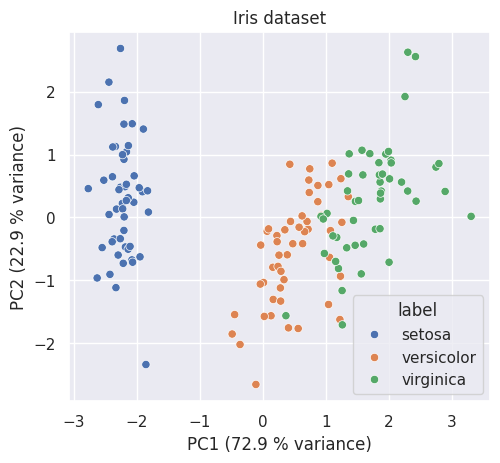

In [ ]:
sns.scatterplot(iris_df_pca, x='PC1', y='PC2', hue='label')
plt.xlabel('PC1 (72.9 % variance)')
plt.ylabel('PC2 (22.9 % variance)')
plt.title('Iris dataset')
plt.gca().set_aspect('equal', adjustable='box')
# we can use this PCA embedding to nicely distinguish between our classes

$new\_features=V^TX$

In [ ]:
pca.components_ # V^T

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [ ]:
iris_df.head().T # X

,0,1,2,3,4
sepal length (cm),5.1,4.9,4.7,4.6,5.0
sepal width (cm),3.5,3.0,3.2,3.1,3.6
petal length (cm),1.4,1.4,1.3,1.5,1.4
petal width (cm),0.2,0.2,0.2,0.2,0.2
label,setosa,setosa,setosa,setosa,setosa


Text(0.5, 1.0, 'Iris dataset')

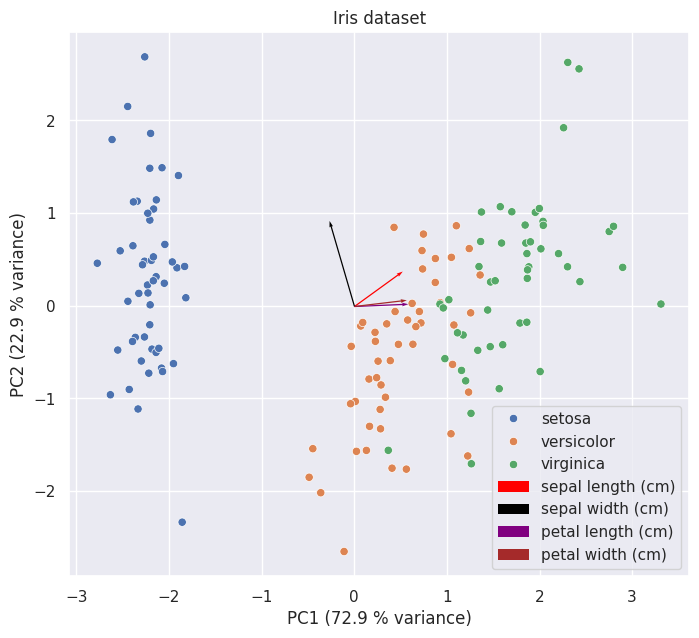

In [ ]:
# loading plot: plot contribution for each feature for top 2 principal components
plt.figure(figsize=(8,8))
sns.scatterplot(iris_df_pca, x='PC1', y='PC2', hue='label')

feat_names = iris_df.columns # (5,)
colors = ['red', 'black', 'purple', 'brown']

loadings = pca.components_ # transformation matrix

for i, feat_name, color in zip(range(loadings.shape[1]), feat_names, colors):
    plt.quiver(
        0, 0,
        loadings[0, i],
        loadings[1, i],
        angles='xy', scale_units='xy',
        scale=1, color=color,
        label=feat_name,
        width=0.002
    )

plt.xlabel('PC1 (72.9 % variance)')
plt.ylabel('PC2 (22.9 % variance)')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Iris dataset')

### Iris - differences between solvers

In [ ]:
pca_full = PCA(svd_solver='full').fit(numeric_iris_df)
pca_arpack = PCA(svd_solver='arpack').fit(numeric_iris_df)
pca_random = PCA(svd_solver='randomized').fit(numeric_iris_df)

In [ ]:
print(pca_full.explained_variance_ratio_)
print(pca_arpack.explained_variance_ratio_) # arpack provides maximum #feature-1 principal components
print(pca_random.explained_variance_ratio_)
# similar results

[0.72962445 0.22850762 0.03668922 0.00517871]
[0.72962445 0.22850762 0.03668922]
[0.72962445 0.22850762 0.03668922 0.00517871]


In [ ]:
print(pca_full.components_)
print(pca_arpack.components_)
print(pca_random.components_)
# similar results

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]]
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


## Wine dataset

The Wine dataset is a classic multivariate dataset used for classification tasks in machine learning.
- It consists of 178 samples of wine from three different cultivars (classes) in the same region in Italy.
- Each sample has 13 continuous attributes (features) that are the result of a chemical analysis of the wines.
- The goal of using this dataset is usually to build a classifier that can predict the cultivar of a wine based on its chemical composition.

The dataset contains following features:

- **Alcohol**: The alcohol content in the wine, measured in percentage.
- **Malic Acid**: The amount of malic acid in the wine, affecting its tartness.
- **Ash**: The measure of the non-aqueous residue remaining after heating, affecting wine stability.
- **Alcalinity of Ash**: A measure of the alkalinity of the ash formed post-combustion, impacting wine's acidity.
- **Magnesium**: The amount of magnesium in the wine, a cofactor in enzyme reactions.
- **Total Phenols**: The total amount of phenolic compounds, contributing to taste and mouthfeel.
- **Flavanoids**: A subset of phenolic compounds known to have antioxidant properties.
- **Nonflavanoid Phenols**: Phenolic compounds that are not flavanoids, contributing to color and flavor.
- **Proanthocyanins**: A class of phenolic compounds affecting color and astringency.
- **Color Intensity**: The intensity of the wine's color, measured optically.
- **Hue**: The color attribute that describes a pure color, usually measured via spectrophotometry.
- **OD280/OD315 of diluted wines**: The absorbance ratio at 280 and 315 nm, indicating protein content and wine stability.
- **Proline**: The amount of the amino acid proline, often linked to wine quality.

In [ ]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()

wine_df_numeric = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

wine_df = wine_df_numeric.copy()
wine_df['label'] = wine_data.target

In [ ]:
wine_df.shape

(178, 14)

In [ ]:
# Label names
target_names = wine_data.target_names
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
wine_df.isnull().sum().T

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
wine_df.describe().T
# our features are not on the same scale

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


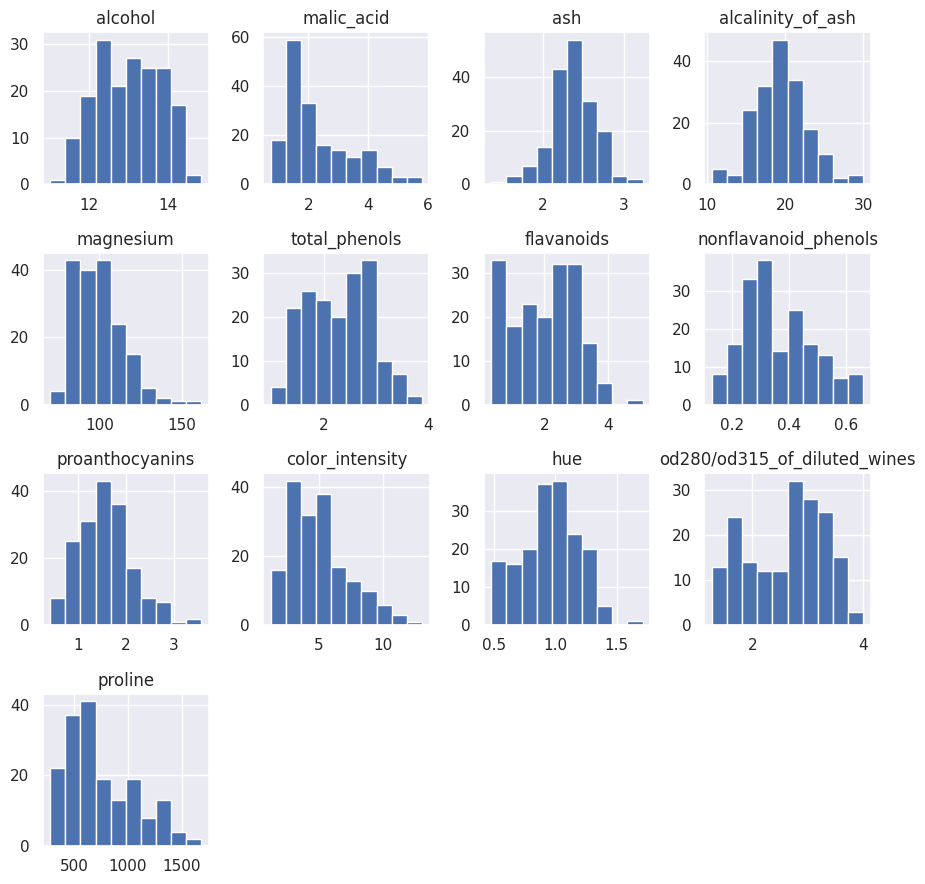

In [ ]:
# Plot all the feature pairs
_ = wine_df_numeric.hist(figsize=(9,9))
plt.tight_layout()

<ipython-input-25-dea232a7e481>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


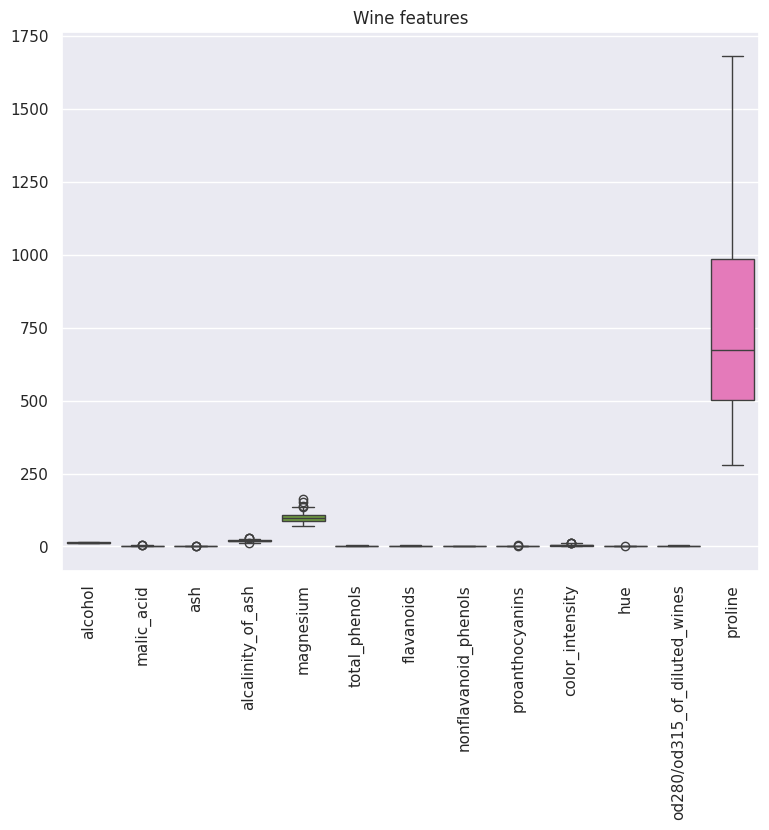

In [ ]:
# Plot each individual feature
plt.figure(figsize=(9,7))
g = sns.boxplot(wine_df_numeric)
plt.title('Wine features')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Run PCA without scaling

In [ ]:
# Perform PCA without scaling the data
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

# Determine variance explained by each component
[var_ration*100 for var_ration in pca.explained_variance_ratio_]
# because no scaling, the first principal component explains almost all the variation in our data which is a bit suspicious

[99.80912304918974,
 0.17359156247057483,
 0.009495895755146108,
 0.005021735618215138,
 0.001236368468789777,
 0.000846213033524829,
 0.00028068145571365146,
 0.00015230805328475265,
 0.00011278304393008576,
 7.214158108199793e-05,
 3.780602665125069e-05,
 2.1201375460769042e-05,
 8.253927880930358e-06]

In [ ]:
[comp*100 for comp in pca.components_[0]] # feature contributions for principal component 1
# all contribution comes from the proline feature

[0.16592647196420726,
 -0.06810155555011521,
 0.01949057418915896,
 -0.4671300581276229,
 1.7868007506895367,
 0.09898296800817925,
 0.15672883017930572,
 -0.012308666181031304,
 0.06006077918217757,
 0.23271431925767475,
 0.0171380037145234,
 0.07049316445910608,
 99.98229365233257]

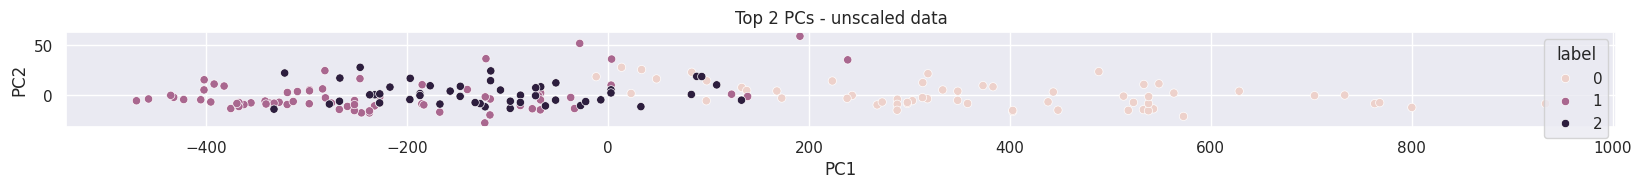

In [ ]:
# Plot first two principal components
plt.figure(figsize=(20,20))
wine_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
wine_df_pca['label'] = wine_df['label']
sns.scatterplot(wine_df_pca, x='PC1', y='PC2', hue='label')
plt.title('Top 2 PCs - unscaled data')
plt.gca().set_aspect('equal', adjustable='box')
# almost all variation is explained by principal component 1

Text(0.5, 1.0, 'Proline feature vs vine types')

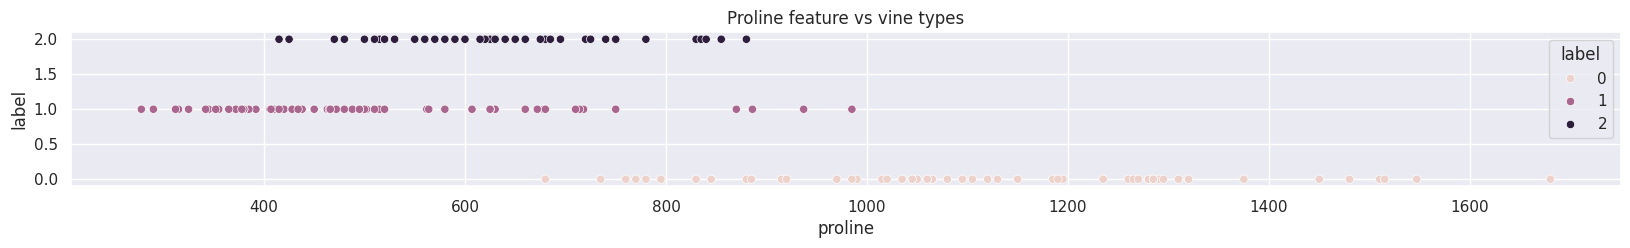

In [ ]:
# Plot proline
plt.figure(figsize=(20,2))
sns.scatterplot(wine_df, x='proline', y='label', hue='label')
plt.title('Proline feature vs vine types')
# if we only plot the proline feature, then the principal component 1 and the proline are almost identical

### Run PCA with scaling

<ipython-input-30-ce729f614e02>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = g.set_xticklabels(g.get_xticklabels(), rotation=90)


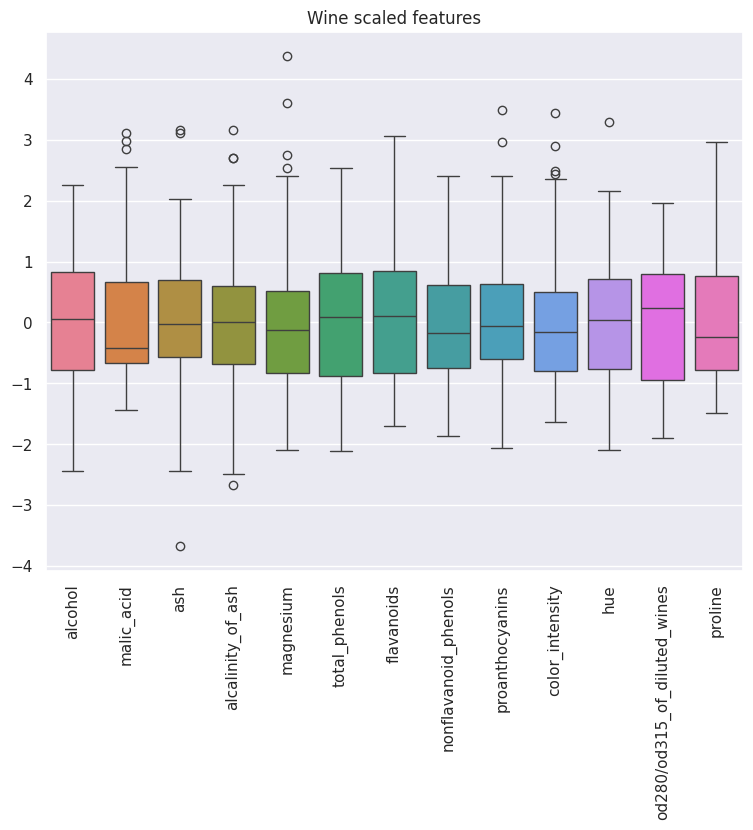

In [ ]:
# Scale the data
standard_scaler = StandardScaler()
standard_scaler.fit(wine_df_numeric)
wine_df_numeric_scaled = standard_scaler.transform(wine_df_numeric)
wine_df_numeric = pd.DataFrame(
    wine_df_numeric_scaled,
    columns = wine_df_numeric.columns
)

plt.figure(figsize=(9,7))
g = sns.boxplot(wine_df_numeric)
plt.title('Wine scaled features')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)
# now all of our features are on similar scale

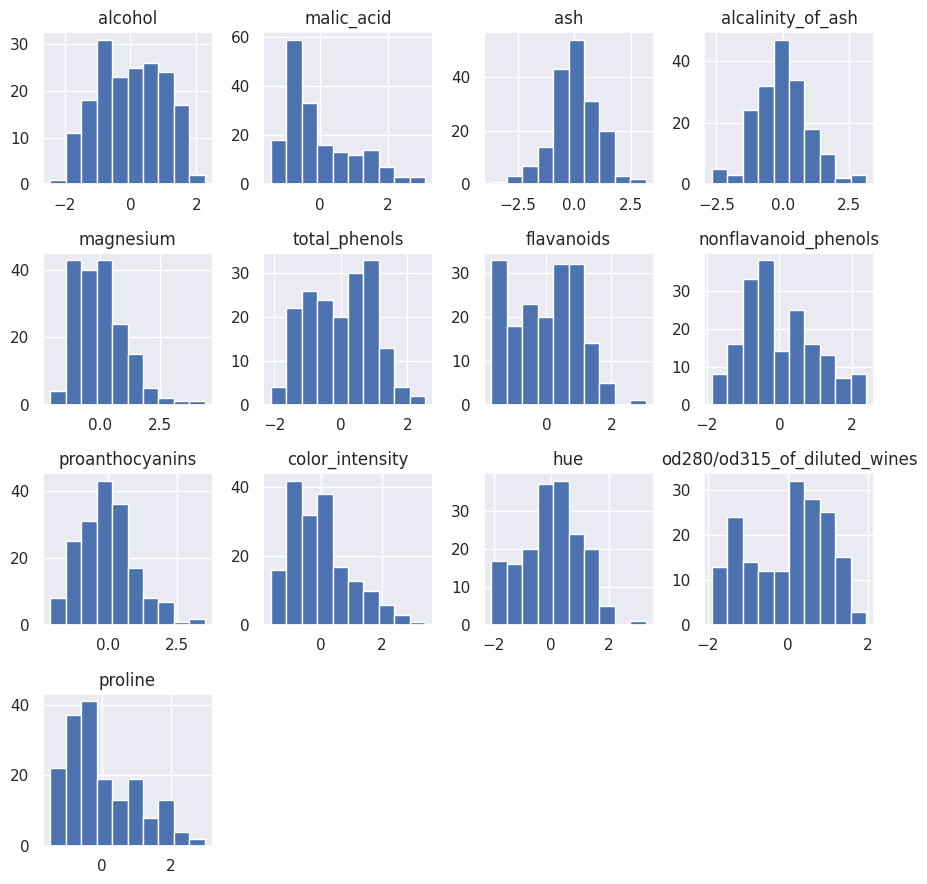

In [ ]:
# Plot all the feature pairs
_ = wine_df_numeric.hist(figsize=(9,9))
plt.tight_layout()

In [ ]:
# Perform PCA
pca = PCA()
pca.fit(wine_df_numeric)
pca_transformed_data = pca.transform(wine_df_numeric)

In [ ]:
# Determine variance explained by each component
[var_ration*100 for var_ration in pca.explained_variance_ratio_]

[36.19884809992633,
 19.20749025700898,
 11.123630536249934,
 7.069030182714045,
 6.563293679648595,
 4.9358233192225756,
 4.238679322623315,
 2.680748948378868,
 2.222153404789714,
 1.9300190939440784,
 1.7368356899899149,
 1.29823257560421,
 0.7952148898994515]

In [ ]:
[comp*100 for comp in pca.components_[0]]

[14.432939540601117,
 -24.518758025722043,
 -0.20510614443709982,
 -23.932040548753495,
 14.19920419529872,
 39.466084506663016,
 42.29342967100592,
 -29.85331029547152,
 31.34294883076887,
 -8.861670472472255,
 29.6714563586381,
 37.61674107387126,
 28.675222689680535]

In [ ]:
# Plot first two principal components
wine_df_pca = pd.DataFrame(pca_transformed_data[:,:2], columns=['PC1', 'PC2'])
wine_df_pca['label'] = wine_df['label']

Text(0, 0.5, 'PC1 [19 % variance]')

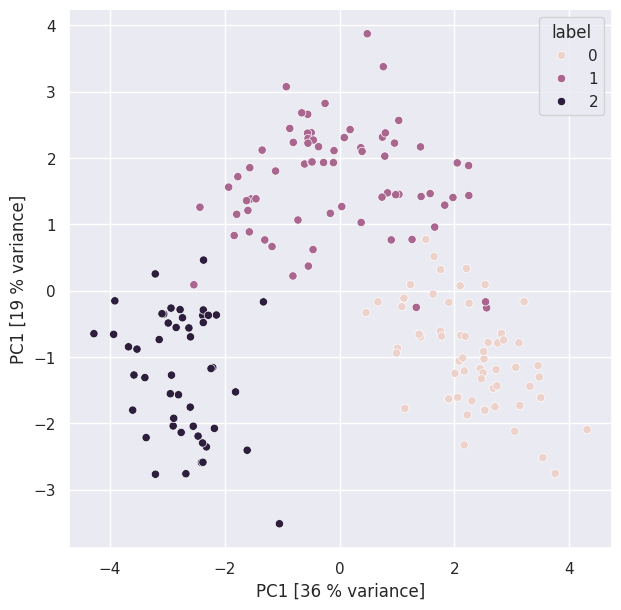

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(wine_df_pca, x='PC1', y='PC2', hue='label')
plt.xlabel('PC1 [36 % variance]')
plt.ylabel('PC1 [19 % variance]')